In [31]:
import matplotlib.pyplot as plt
import json
from collections import Counter
import numpy
from linear_algebra import distance

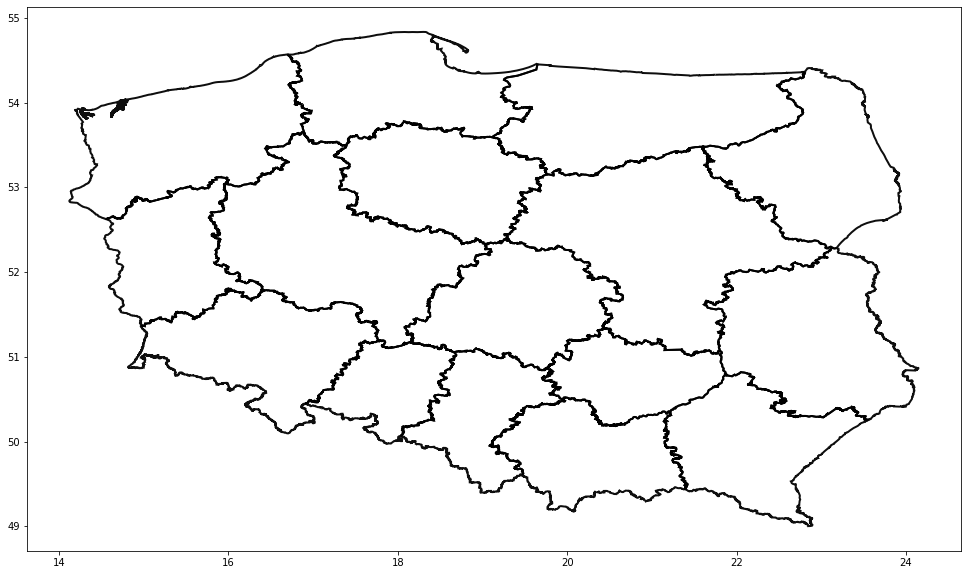

In [32]:
from descartes import PolygonPatch
#wczytanie pliku geojson ze strony mapshaper
geojson = {}
with open("gadm36_POL_1.json", "r") as f:
    geojson = json.load(f)
fig = plt.figure(figsize=(20,10)) 
ax = fig.gca() 
for poly in geojson['geometries']:
    ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
    ax.axis('scaled')
plt.show()

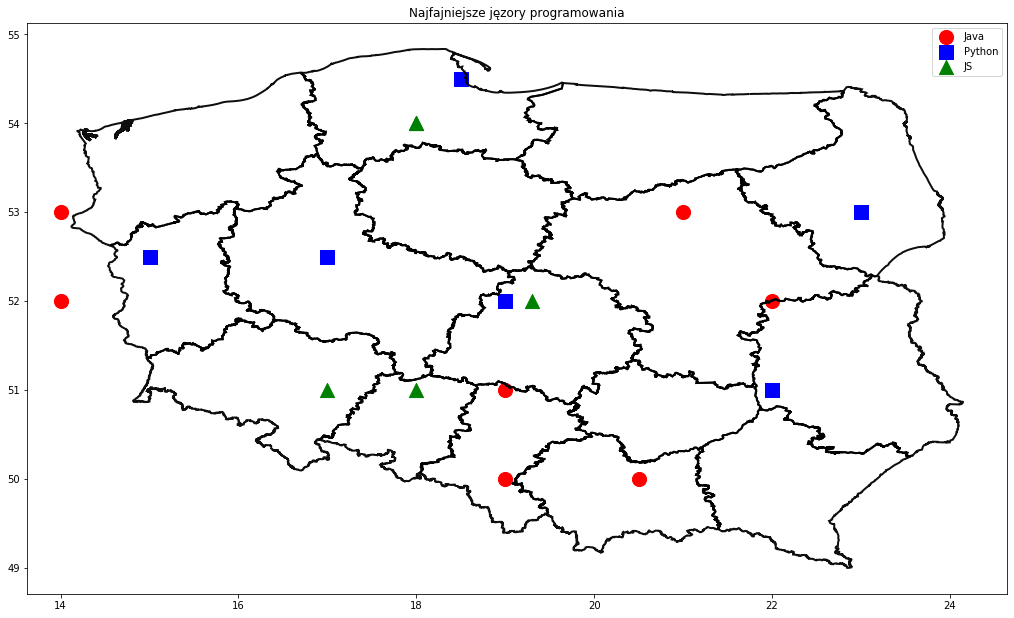

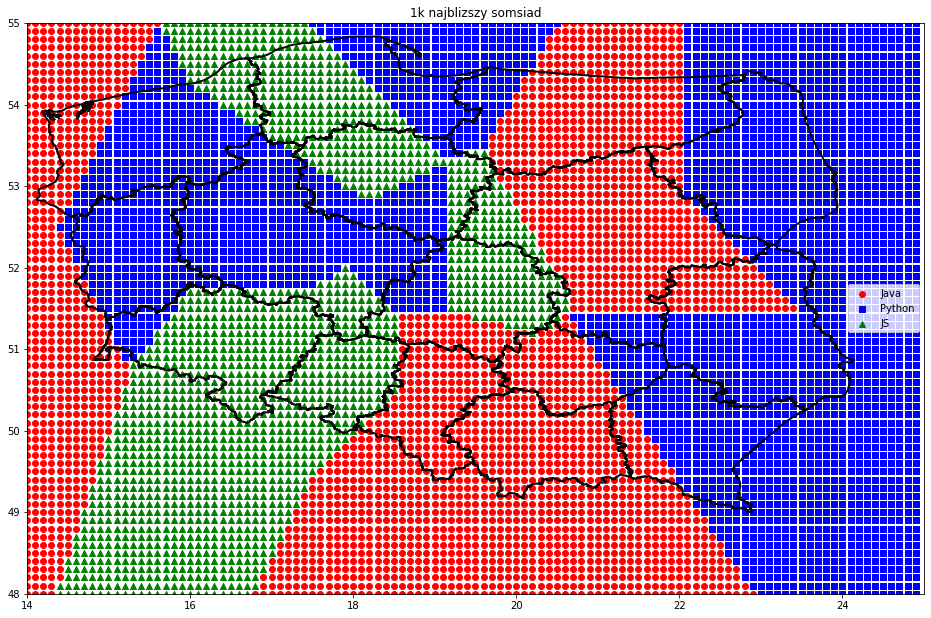

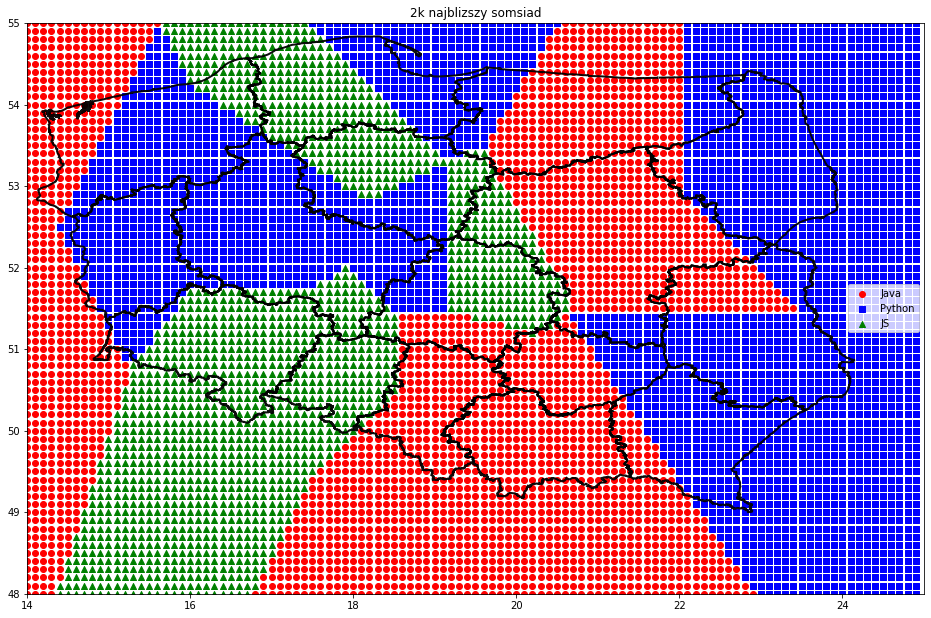

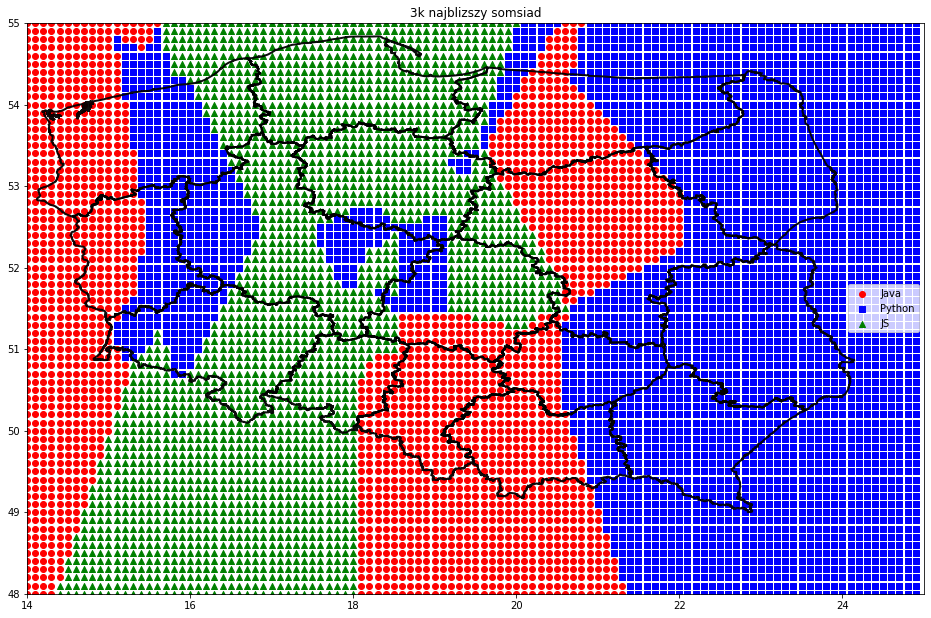

In [ ]:
# losowe wartosci dla danych wejsciowych analizy danych dot. ulubionego jezyka
cities = [(19,50,'Java'),(18,54,'JS'),(23,53,'Python'), (21,53,'Java'), (14,52,'Java'), (22,51,'Python'),(18,51,'JS'),(22,52,'Java'),(18,54,'JS'),(23,53,'Python'), (19,51,'Java'), (14,53,'Java'), (22,51,'Python'),(17,51,'JS'),
          (20.5,50,'Java'), (15,52.5,'Python'), (17,52.5,'Python'),(19,52,'Python'),(19.3,52,'JS'),(18.5,54.5,'Python')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])

    
def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)


def plot_state_borders(plt, color='0.8'):
    eojson = {}
    with open("gadm36_POL_1.json", "r") as f:
        geojson = json.load(f)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax = plt.gca() 
    for poly in geojson['geometries']:
        ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
        ax.axis('scaled')

def plot_cities():

    plots = { "Java" : ([], []), "Python" : ([], []), "JS" : ([], []) }

    markers = { "Java" : "o", "Python" : "s", "JS" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "JS" : "g" }

    plot_state_borders(plt)    
    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10, s=200)

    plt.legend(loc=0)
    plt.title("Najfajniejsze jęzory programowania")
    plt.show()

def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "JS" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "JS" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "JS" : "g" }

    for longitude in numpy.arange(13, 25, 0.1):
        for latitude in numpy.arange(48, 56, 0.1):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black') 

    plt.legend(loc=0)          
    plt.axis([14,25,48,55])
    plt.title(str(k) + "k najblizszy somsiad")
    plt.show()

plot_cities()
for k in range(1,10):
    classify_and_plot_grid(k)